Here I load multiple multivariate timeseries regression datasets

In [12]:
# OPTIONAL: Load the "autoreload" extension so that code can change. But blacklist large modules
%load_ext autoreload
%autoreload 2
%aimport -pandas
%aimport -torch
%aimport -numpy
%aimport -matplotlib
%aimport -dask
%aimport -tqdm
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from pathlib import Path
from matplotlib import pyplot as plt
from seq2seq_time.data.data import IMOSCurrentsVel, AppliancesEnergyPrediction, BejingPM25, GasSensor, MetroInterstateTraffic

In [20]:
datasets_root = Path('../data/processed/')

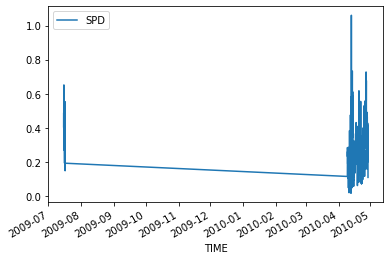

,VCUR,UCUR,WCUR,TEMP,PRES_REL,DEPTH,ROLL,PITCH,LATITUDE,LONGITUDE,M2,S2,N2,K2,K1,O1,P1,Q1,M4,M6,S4,MK3,MM,SSA,SA,SPD
TIME,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-07-15 08:00:00,-0.396391,0.089687,-0.009671,18.549999,205.076004,203.550812,4.6,-3.4,-31.728650,115.037217,0.638670,-5.000000e-01,-0.646523,-0.617351,0.930835,0.286288,0.116457,-1.014973,-0.146817,-0.801534,-0.500000,0.370082,0.132683,-0.686775,-0.395743,0.406411
2009-07-15 08:30:00,-0.406632,0.119376,-0.003729,18.799999,205.067001,203.541901,4.7,-2.4,-31.728650,115.037217,0.431959,-2.588191e-01,-0.808005,-0.854013,0.990437,0.154727,0.244751,-1.058780,-0.589276,-0.924071,-0.866025,0.716890,0.137073,-0.686253,-0.396072,0.423792
2009-07-15 09:00:00,-0.445501,0.136615,-0.018275,18.950001,205.059998,203.534958,5.2,-3.5,-31.728650,115.037217,0.197760,-3.355459e-08,-0.919972,-1.032158,1.033000,0.020878,0.368881,-1.088129,-0.884126,-0.539590,-1.000000,0.959177,0.141459,-0.685732,-0.396401,0.465978
2009-07-15 09:30:00,-0.476184,0.106824,-0.003664,19.049999,205.056000,203.530975,4.8,-3.0,-31.728650,115.037217,-0.049024,2.588190e-01,-0.975563,-1.139580,1.057791,-0.113279,0.486733,-1.102618,-0.957510,0.140953,-0.866025,1.061620,0.145843,-0.685210,-0.396730,0.488019
2009-07-15 10:00:00,-0.455938,0.073769,-0.014929,19.120001,205.052002,203.527023,5.4,-3.9,-31.728650,115.037217,-0.292688,4.999999e-01,-0.971373,-1.168919,1.064384,-0.245761,0.596302,-1.102049,-0.791046,0.744158,-0.500000,1.009281,0.150223,-0.684688,-0.397059,0.461867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-26 01:00:00,-0.436635,-0.784922,-0.012147,16.610001,197.384003,195.919662,-2.9,3.0,-31.728717,115.042133,0.960594,8.675942e-01,-0.841602,0.704716,-0.475311,-0.734741,0.190139,0.964792,0.882484,0.770444,0.505439,1.028587,-0.881951,0.990514,0.997626,0.898194
2020-03-26 01:30:00,-0.355067,-0.845100,-0.005201,16.629999,197.408005,195.943497,-2.7,3.0,-31.728717,115.042133,0.980035,7.093279e-01,-0.939708,0.438315,-0.595895,-0.629257,0.316317,0.895545,0.957914,0.933774,0.006292,0.851981,-0.880483,0.990416,0.997601,0.916660
2020-03-26 02:00:00,-0.568277,-0.816935,-0.024944,16.660000,197.412994,195.948425,-2.6,2.9,-31.728717,115.042133,0.937112,5.027222e-01,-0.980228,0.141881,-0.706228,-0.514470,0.437113,0.814067,0.793395,0.584762,-0.494541,0.551159,-0.878996,0.990316,0.997576,0.995149


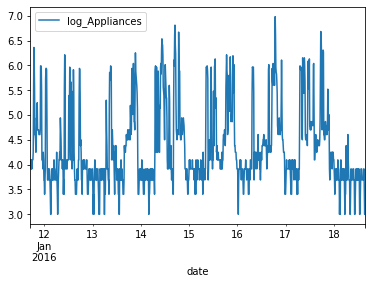

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,log_Appliances,month,day,week,hour,minute,dayofweek
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,4.094345,1,11,2,17,0,0
2016-01-11 17:10:00,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,4.094345,1,11,2,17,10,0
2016-01-11 17:20:00,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,3.912023,1,11,2,17,20,0
2016-01-11 17:30:00,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,3.912023,1,11,2,17,30,0
2016-01-11 17:40:00,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,4.094345,1,11,2,17,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,4.605170,5,27,21,17,20,4
2016-05-27 17:30:00,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,4.499810,5,27,21,17,30,4
2016-05-27 17:40:00,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,5.598422,5,27,21,17,40,4


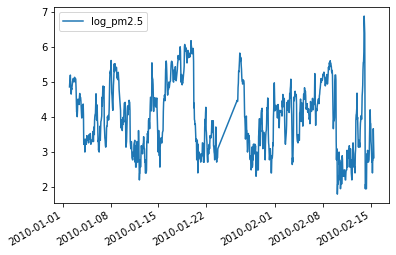

,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,log_pm2.5,month,day,week,hour,minute,dayofweek
2010-01-02 00:00:00+08:00,-16.0,-4.0,1020.0,SE,1.79,0.0,0.0,4.859812,1,2,53,0,0,5
2010-01-02 01:00:00+08:00,-15.0,-4.0,1020.0,SE,2.68,0.0,0.0,4.997212,1,2,53,1,0,5
2010-01-02 02:00:00+08:00,-11.0,-5.0,1021.0,SE,3.57,0.0,0.0,5.068904,1,2,53,2,0,5
2010-01-02 03:00:00+08:00,-7.0,-5.0,1022.0,SE,5.36,1.0,0.0,5.198497,1,2,53,3,0,5
2010-01-02 04:00:00+08:00,-7.0,-5.0,1022.0,SE,6.25,2.0,0.0,4.927254,1,2,53,4,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00+08:00,-23.0,-2.0,1034.0,NW,231.97,0.0,0.0,2.079443,12,31,1,19,0,2
2014-12-31 20:00:00+08:00,-22.0,-3.0,1034.0,NW,237.78,0.0,0.0,2.302586,12,31,1,20,0,2
2014-12-31 21:00:00+08:00,-22.0,-3.0,1034.0,NW,242.70,0.0,0.0,2.302586,12,31,1,21,0,2
2014-12-31 22:00:00+08:00,-22.0,-4.0,1034.0,NW,246.72,0.0,0.0,2.079443,12,31,1,22,0,2


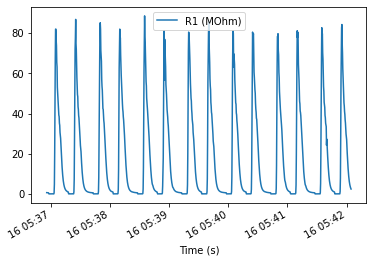

,CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm)
Time (s),,,,,,
2016-10-16 05:36:55.800,0.0,48.4700,24.6200,247.4926,0.2000,0.6831
2016-10-16 05:36:56.100,0.0,48.4700,24.6200,243.8282,0.1998,0.6649
2016-10-16 05:36:56.400,0.0,48.4700,24.6200,243.0668,0.2000,0.6481
2016-10-16 05:36:56.700,0.0,48.4700,24.6200,242.3030,0.2000,0.6318
2016-10-16 05:36:57.000,0.0,48.4702,24.6206,241.5632,0.2000,0.6178
...,...,...,...,...,...,...
2016-10-17 06:52:04.500,0.0,63.9400,24.6200,0.0000,0.2080,9.9322
2016-10-17 06:52:04.800,0.0,63.9400,24.6200,0.0000,0.2050,31.7887
2016-10-17 06:52:05.100,0.0,63.9400,24.6200,0.0000,0.2040,57.7304


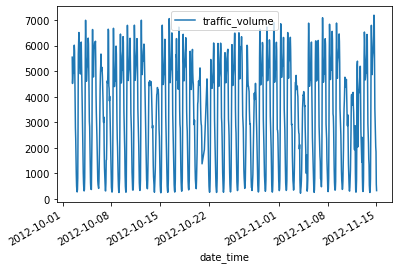

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,month,day,week,hour,minute,dayofweek
date_time,,,,,,,,,,,,,,
2012-10-02 09:00:00,True,288.28,0.0,0.0,40.0,Clouds,scattered clouds,5545.0,10,2,40,9,0,1
2012-10-02 10:00:00,True,289.36,0.0,0.0,75.0,Clouds,broken clouds,4516.0,10,2,40,10,0,1
2012-10-02 11:00:00,True,289.58,0.0,0.0,90.0,Clouds,overcast clouds,4767.0,10,2,40,11,0,1
2012-10-02 12:00:00,True,290.13,0.0,0.0,90.0,Clouds,overcast clouds,5026.0,10,2,40,12,0,1
2012-10-02 13:00:00,True,291.14,0.0,0.0,75.0,Clouds,broken clouds,4918.0,10,2,40,13,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,True,283.45,0.0,0.0,75.0,Clouds,broken clouds,3543.0,9,30,39,19,0,6
2018-09-30 20:00:00,True,282.76,0.0,0.0,90.0,Clouds,overcast clouds,2781.0,9,30,39,20,0,6
2018-09-30 21:00:00,True,282.73,0.0,0.0,90.0,Thunderstorm,proximity thunderstorm,2159.0,9,30,39,21,0,6


In [21]:
for Dataset in [IMOSCurrentsVel, AppliancesEnergyPrediction, BejingPM25, GasSensor, MetroInterstateTraffic]:
    dataset = Dataset(datasets_root)
    dataset.df[dataset.columns_target].dropna().head(1000).plot()
    plt.show()
    display(dataset.df)